In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("examresults.csv")
df.set_index("name",inplace=True)

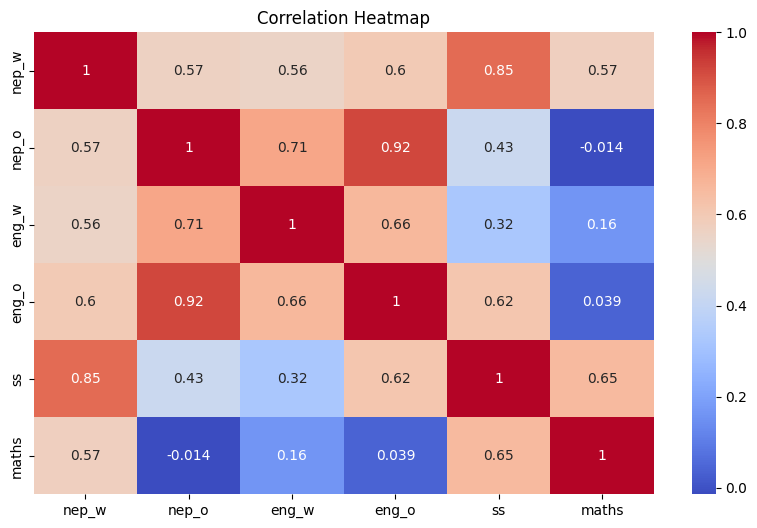

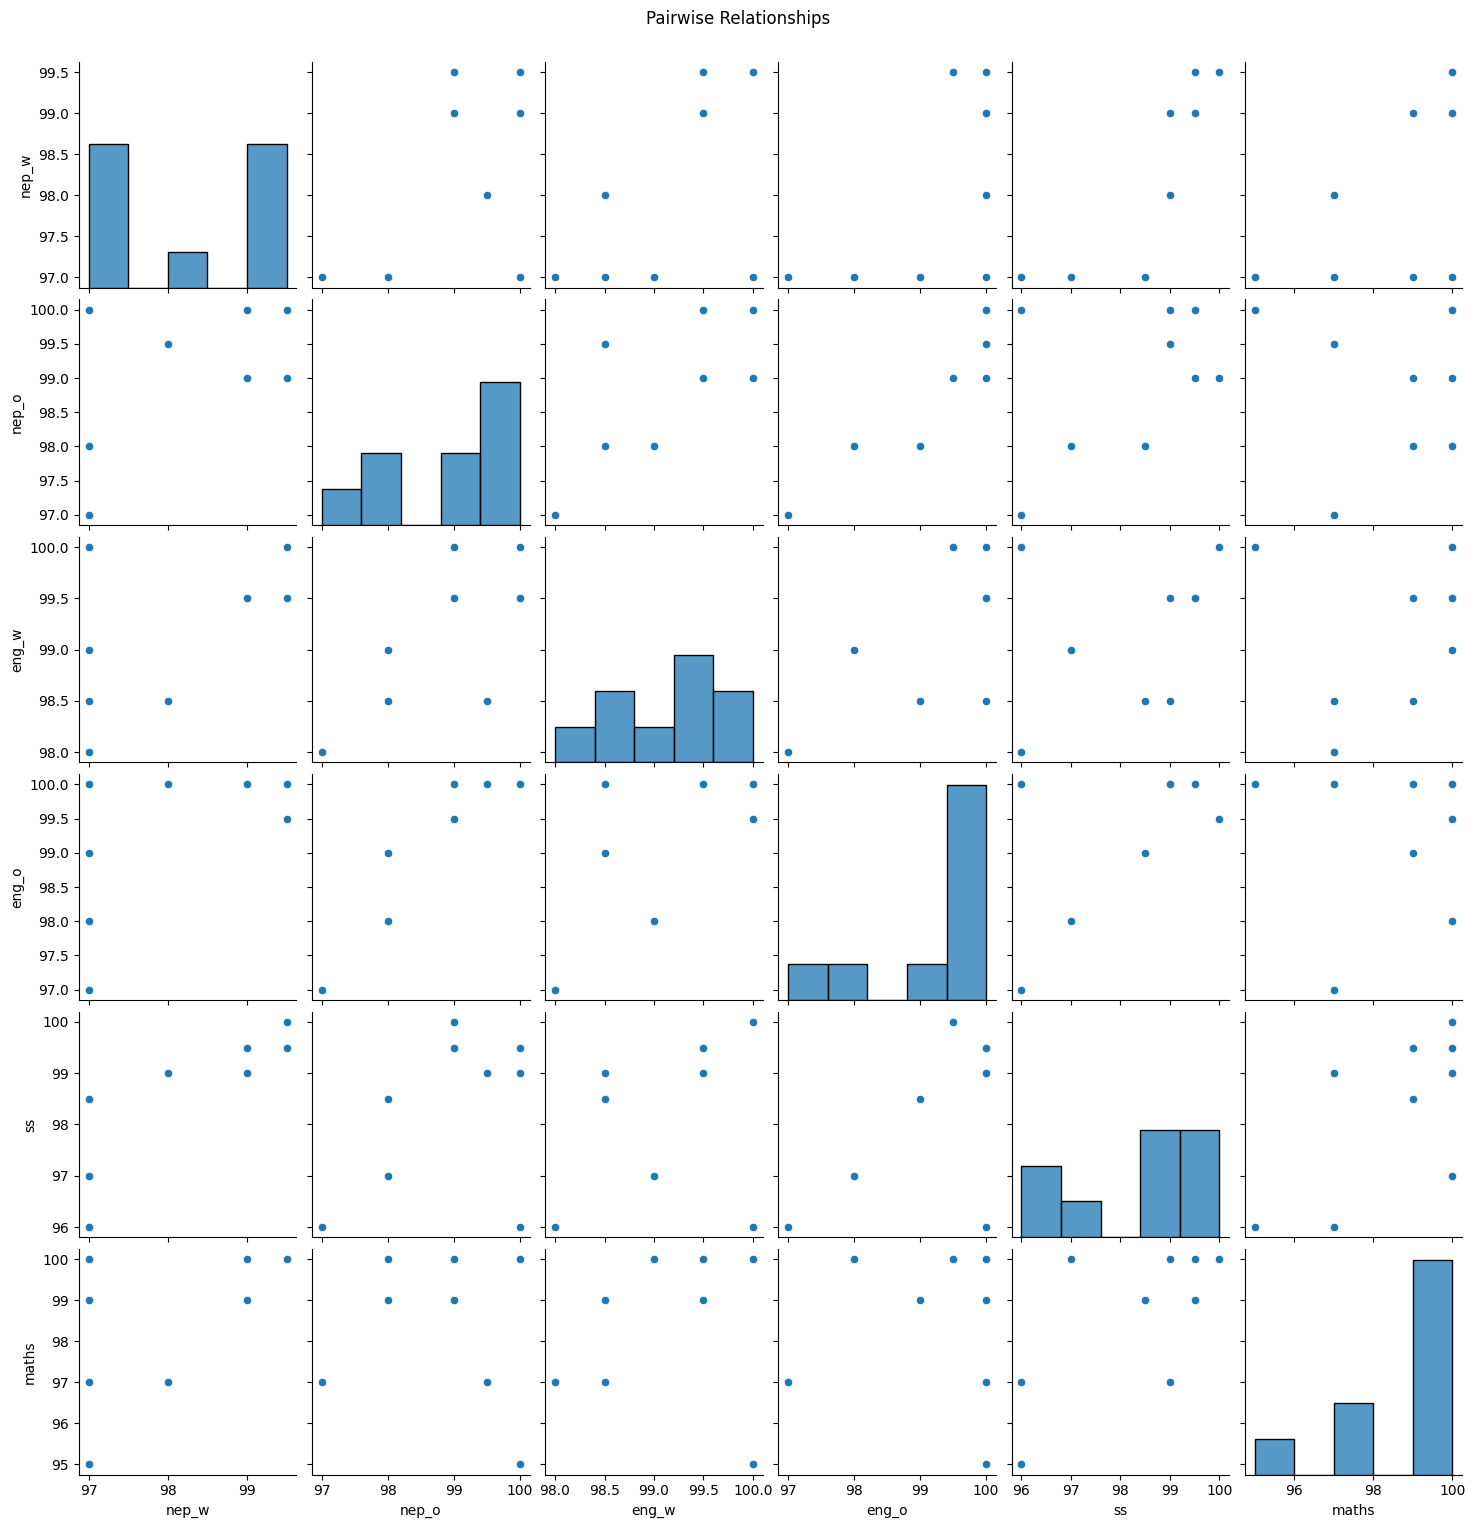

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationship between subjects
sns.pairplot(df.reset_index().drop('name', axis=1))
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [4]:
# Separate target and features
X = df.drop('maths', axis=1).iloc[:-1]  # All rows except target
y = df['maths'].iloc[:-1]

# Target row to predict
X_target = df.drop('maths', axis=1).iloc[-1:]
y_target = df['maths'].iloc[-1:]

In [5]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict the maths score of target
prediction = model.predict(X_target)
print("Predicted Maths Score for exam_target:", prediction[0])
print("Actual Maths Score:", y_target.values[0])

Predicted Maths Score for exam_target: 97.82793005097892
Actual Maths Score: 99


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
print("R² score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R² score: 0.8358281424256697
MSE: 0.5335585371165736


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
poly_pred = poly_model.predict(X_target)

print("Poly Predicted Maths Score:", poly_pred[0])


Poly Predicted Maths Score: 97.45721483538182


In [9]:
import pandas as pd

# Load your data
df = pd.read_csv("examresults.csv", index_col=0)

# Separate features (X) and target (y)
X = df.iloc[:-1]   # first 8 exams
y = df.iloc[-1]    # exam_target row

print("Feature matrix (X):")
print(X)
print("\nTarget vector (y):")
print(y)


Feature matrix (X):
        nep_w  nep_o  eng_w  eng_o     ss  maths
name                                            
exam_0   97.0  100.0  100.0  100.0   96.0     95
exam_1   97.0   97.0   98.0   97.0   96.0     97
exam_2   97.0   98.0   99.0   98.0   97.0    100
exam_3   99.0  100.0   99.5  100.0   99.0    100
exam_4   99.5  100.0   99.5  100.0   99.5    100
exam_5   99.5   99.0  100.0   99.5  100.0    100
exam_6   98.0   99.5   98.5  100.0   99.0     97
exam_7   99.0   99.0   99.5  100.0   99.5     99

Target vector (y):
nep_w    97.0
nep_o    98.0
eng_w    98.5
eng_o    99.0
ss       98.5
maths    99.0
Name: exam_target, dtype: float64


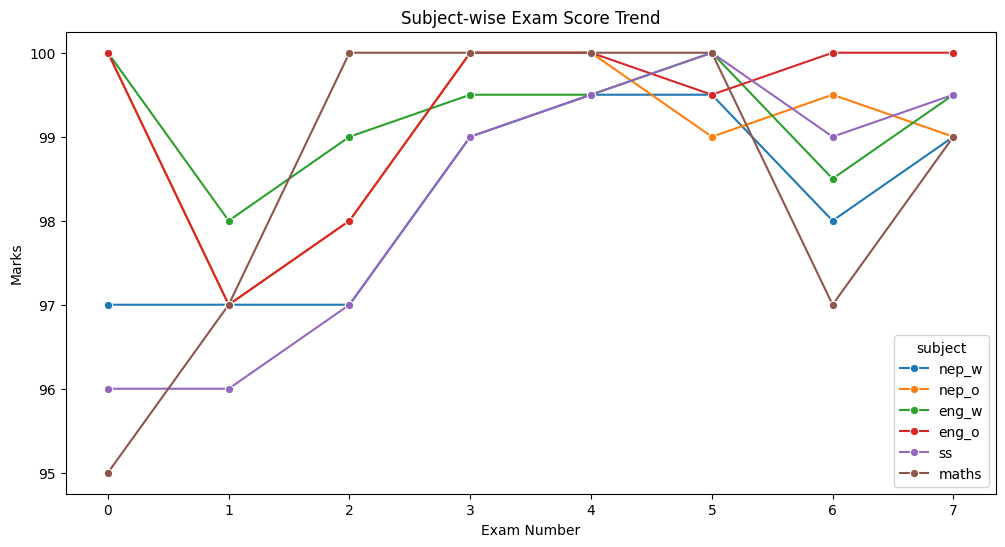

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert index to numeric (exam_0 -> 0, etc.)
X_copy = X.copy()
X_copy["exam"] = range(len(X_copy))

# Melt the dataframe for seaborn
melted = pd.melt(X_copy, id_vars=["exam"], var_name="subject", value_name="marks")

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted, x="exam", y="marks", hue="subject", marker="o")
plt.title("Subject-wise Exam Score Trend")
plt.xlabel("Exam Number")
plt.ylabel("Marks")
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression

models = {}
predictions = {}

# Create a list of subject names
subjects = df.columns.tolist()

for subject in subjects:
    model = LinearRegression()

    # Use exam index as independent variable (0 to 7)
    X_exam_numbers = X.index.str.extract(r'exam_(\d)').astype(int)  # extract 0-7
    y_subject = X[subject]

    model.fit(X_exam_numbers, y_subject)
    y_pred = model.predict([[8]])  # Predict for exam_8 (target)

    models[subject] = model
    predictions[subject] = y_pred[0]

print("Predicted Marks for Exam Target:")
for subject, pred in predictions.items():
    print(f"{subject}: {pred:.2f}")


Predicted Marks for Exam Target:
nep_w: 99.70
nep_o: 99.52
eng_w: 99.36
eng_o: 100.36
ss: 100.88
maths: 100.00



Comparison of Actual vs Predicted Marks:
       Actual   Predicted
nep_w    97.0   99.696429
nep_o    98.0   99.517857
eng_w    98.5   99.357143
eng_o    99.0  100.357143
ss       98.5  100.875000
maths    99.0  100.000000


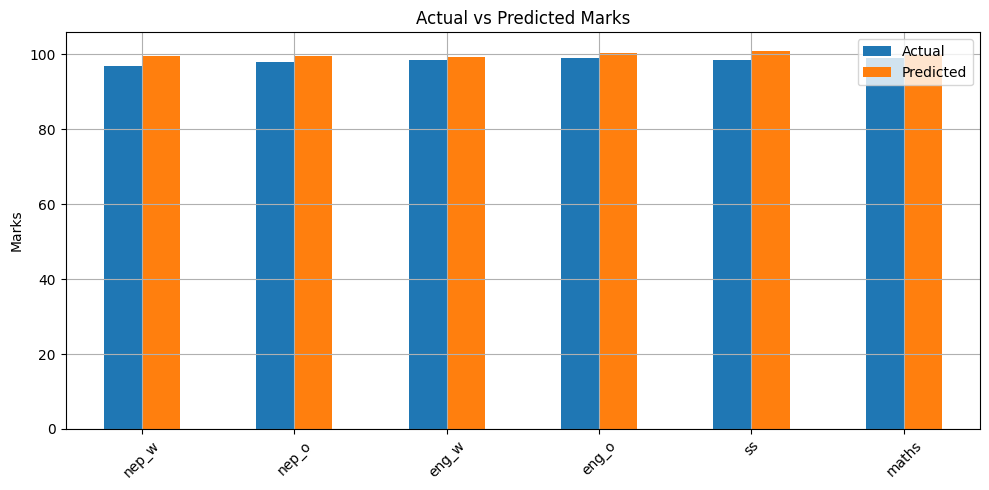

In [12]:
# Convert to Series
predicted_series = pd.Series(predictions)
actual_series = y

comparison_df = pd.DataFrame({
    "Actual": actual_series,
    "Predicted": predicted_series
})

print("\nComparison of Actual vs Predicted Marks:")
print(comparison_df)

# Visualize
comparison_df.plot(kind='bar', figsize=(10, 5), title="Actual vs Predicted Marks")
plt.ylabel("Marks")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
